# 04_NLPIntro.ipynb

텍스트 데이터는 비교적 많다. 딥러닝 모델로 문장을 분류하거나, 단어를 예측하고 글을 생성하는 등 학습을 위해서는 텍스트 데이터를 기계가 인식할 수 있게 변환해 주어야한다.

첫 번째는, 언어에서 의미를 가지는 최소 단위인 단어를 숫자로 변환하는 것이다. -> 문장은 단어들로 이루어진 벡터가 될 것이다. 이를 토크나이즈라고 한다.

### 1. Tokenizer

Char(문자)를 토큰으로 인코딩하면 LISTEN과 SILENT의 차이가 없어진다.

Semantic(의미)를 보존하기 위해 Word(단어) 단위로 인코딩을 해보자

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sub_sentences = [
    'i love my dog',
    'I, love my cat',
    '하림 바보',
    ]

# 토크나이저 클래스를 통한 인스턴스생성, 
# num_words는 문장을 토큰화 벡터로 변환할 때, 토큰의 갯수를 빈도수 순서대로 제한하는 것.
# oov_token은 out of value로, 서브 데이터를 fit해서 단어-토큰 맵을 만들고,
# 대규모 데이터를 Tokenize 할 때, 없으면 지정할 Defalut값으로 생각하면 된다.
tokenizer = Tokenizer(num_words = 100, oov_token='<OOV>')

# corpus를 학습해보자. (corpus: 대규모 학습데이터)
tokenizer.fit_on_texts(sub_sentences)

# 단어들이 토큰과 맵핑된 word_index를 보자. 
# 여기서는 num_words와 관계없이 전체 단어 종류가 나온다.
word_index = tokenizer.word_index


sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    '예슬 바보',
    'I love my cat I love my cat I love my cat' # 긴 문자열
]

# 결과를 보면, 기존에 없던 You와 예슬이 <OOV> : 1로 매칭되는 것을 볼 수 있다.
sequences = tokenizer.texts_to_sequences(sentences)
print("\nWord Index = " , word_index)
print("Sequences")
for i in range(len(sentences)):
    print(sentences[i] , " : ", sequences[i])


Word Index =  {'<OOV>': 1, 'i': 2, 'love': 3, 'my': 4, 'dog': 5, 'cat': 6, '하림': 7, '바보': 8}
Sequences
I love my dog  :  [2, 3, 4, 5]
I love my cat  :  [2, 3, 4, 6]
You love my dog!  :  [1, 3, 4, 5]
예슬 바보  :  [1, 8]
I love my cat I love my cat I love my cat  :  [2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]


문장에서 단어-토큰 벡터맵을 만들고, 문장들을 토큰벡터들의 집합으로 만드는 법을 배웠다. 

이미지 분류할 때, 넣는 이미지의 차원(가로, 세로, RGB)을 맞춰줬던 것처럼,

토큰 벡터의 사이즈를 맞춰줘야 학습이 가능하다.

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 토큰 벡터를 패딩해주자, maxlen으로 패딩 및 사이즈 조정할 것을 정할 수 있다.
padded = pad_sequences(sequences, maxlen=6)
print("\nPadded Sequences:")
print(padded)

# padding으로 0을 앞, 뒤에 채울지 정할 수 있다. 기본값은 pre
padded = pad_sequences(sequences, maxlen=6, padding = 'post')
print("\nPadded Sequences:")
print(padded)


# 길이가 긴 문자열을 자를 때 앞, 뒤 중 어디를 자를지 고를 수 있다. 기본값은 pre
padded = pad_sequences(sequences, maxlen=6, padding = 'post', truncating = 'post' )
print("\nPadded Sequences:")
print(padded)



Padded Sequences:
[[0 0 2 3 4 5]
 [0 0 2 3 4 6]
 [0 0 1 3 4 5]
 [0 0 0 0 1 8]
 [4 6 2 3 4 6]]

Padded Sequences:
[[2 3 4 5 0 0]
 [2 3 4 6 0 0]
 [1 3 4 5 0 0]
 [1 8 0 0 0 0]
 [4 6 2 3 4 6]]

Padded Sequences:
[[2 3 4 5 0 0]
 [2 3 4 6 0 0]
 [1 3 4 5 0 0]
 [1 8 0 0 0 0]
 [2 3 4 6 2 3]]


### 2. Word Embadding (Word2Vec)

간단하게 워드 임베딩 개념에 대해 알아보자.

단어를 토크나이즈하면 모델에 넣을 수는 있지만, 단어간의 관계를 나타내는데는 제한적이다.

단어간 유사도를 정량적으로 측정하고, 이렇게 임베딩된 단어들을 활용하면 자연어처리의 성능이 향상된다.

임베딩할 때, dimension은 벡터의 길이만큼 존재하고, 각 dimension의 의미는 추측할 수 있다. (PCA와 동일)

예시를 보면, 

```markdown
---------------------------------
- Word Index  
'brave' :   1,
'king'  :   2,
'queen' :   3, 
'beauty':   4, 
...

- After Embadding 
'brave' :   [0.62, 0.06, ...],
'king'  :   [0.93, 0.91, ...],
'queen' :   [0.04, 0.98, ...], 
'beauty':   [0.18, 0.11, ...],  

여기서는 첫 두 dimension을 성별, 인간/수식어 정도로 해석 가능하다.
...
---------------------------------
```
벡터간 유사도는 코사인 유사도를 사용하면된다. 여기서 핵심은 단어를 벡터화 할 때, 무엇을 기준으로 유사도를 학습하는가이다.

대표적인 임베딩 기법은 Skip-gram, CBOW가 있다.

skip-gram : 특정 단어를 가지고 양옆 n개 단어 예측
CBOW : 주위 단어를 가지고 가운데 단어 예측

Wordembadding과 skip-gram이 학습되는 과정에 대해 10분정도 설명된 영상이 있다. 어려우면 참고해보자. [word2vec](https://www.youtube.com/watch?v=sY4YyacSsLc&t=149s)

<hr>

다음 영화 리뷰 practice에서는 Tokenize -> DNN 순서인데, 중간에 embadding layer가 존재한다.

embadding layer는 문장만으로 학습화는 Word2Vec과 달리 레이블 예측하는 과정과 함께 레이어가 학습된다.

해당 리뷰가 좋은지 나쁜지에 따라 단어간 유사도가 학습된다고 해석할 수 있다...

(레이블을 잘 구분하는 가를 기준으로 단어간 유사도가 결정것으로 보인다.) 

50000개의 영화 리뷰가 있는 IMDB 데이터셋을 사용해보자

In [7]:
# 패키지가 없다면...
#!pip install -q tensorflow-datasets --user
#!pip install protobuf==3.2.* --user


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import tensorflow_datasets as tfds

# Load the IMDB Reviews dataset
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

c:\Users\suhye\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 100%|██████████| 1/1 [00:46<00:00, 46.49s/ url]
                                                                        

Dataset imdb_reviews downloaded and prepared to C:\Users\suhye\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [9]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='C:\\Users\\suhye\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num

어떤 식으로 되어 있는지 데이터 두 개만 뽑아보자

In [10]:
for example in imdb['train'].take(2):
  print(example)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

```markdown
(<tf.Tensor: shape=(), dtype=string, numpy=b"This ... sit through it.">, 
<tf.Tensor: shape=(), dtype=int64, numpy=0>)
```

text와 label의 자료형이 텐서로 되어있다...
이를 토크나이즈 하기 위해서 넘파이로 저장하자.

In [11]:
import numpy as np

# 트레인 테스트 나눠주고,
train_data, test_data = imdb['train'], imdb['test']

# 문장, 라벨도 나누어주자.
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# Loop over all training examples and save the sentences and labels
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

# Loop over all test examples and save the sentences and labels
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

# Convert labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [12]:
# 커스텀 파라미터들
vocab_size = 10000
max_length = 120
embedding_dim = 16 # 단어를 임베딩할 적절한 차원수를 설정하자. 이전의 성별, 사람여부 등 뽑아내고 싶은 차원의 갯수라고 보면된다.
trunc_type = 'post'
oov_tok = "<OOV>"

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)


In [14]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [16]:
num_epochs = 10

# Train the model
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 2s 3ms/step - loss: 1.0021e-04 - accuracy: 1.0000 - val_loss: 0.9655 - val_accuracy: 0.8092
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 6.1425e-05 - accuracy: 1.0000 - val_loss: 1.0004 - val_accuracy: 0.8097
Epoch 3/10
782/782 [==============================] - 2s 2ms/step - loss: 3.8324e-05 - accuracy: 1.0000 - val_loss: 1.0442 - val_accuracy: 0.8100
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 2.4168e-05 - accuracy: 1.0000 - val_loss: 1.0852 - val_accuracy: 0.8100
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 1.5230e-05 - accuracy: 1.0000 - val_loss: 1.1256 - val_accuracy: 0.8098
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 9.7018e-06 - accuracy: 1.0000 - val_loss: 1.1655 - val_accuracy: 0.8097
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 6.2729e-06 - accuracy: 1.0000 - val_loss: 1.2043 -

In [17]:
# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 

(10000, 16)


In [18]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

[임베딩 프로젝터](https://projector.tensorflow.org/)

여기 좌측 Load를 누르고, 아래서 다운받은(작성한) 벡터와 메타파일을 로드하면 임베딩을 시각화 할 수 있다.


- Sphereize data를 누르면 레이블을 구별하기 편하다.
- 밑에 PCA는 가장 설명력이 좋은 dimension 3가지를 기준으로 보여주는데, 다른 dimension을 골라서 볼 수 있다.


In [19]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

#### parameter Custom

사르카즘(비꼬기, 풍자) 데이터.

일반적인 딥러닝 하이퍼 파라미터들과 더불어 다음과 같은 파라미터 설정이 중요하다.

- 단어의 종류 수    : vocab_size   ()
- 문장을 끊는 길이  : max_length   (패딩이 많아 지거나 단어가 잘릴 수 있다.)


단어의 종류 수 같은 경우 embadding layer에서 바꾸고자하는 단어수 * dimension만큼 학습매개변수가 존재하게 된다.
학습 데이터가 충분하지 않다면, 단어간의 관계를 파악하기 어려워 질 수 있다.

문장을 끊는 길이에 따라 0으로 패딩할 영역이 많아지거나 영역이 잘 끊기거나 할 수 있어서 데이터셋 내 문장의 길이를 고려해야 한다.


하이퍼 파라미터를 튜닝하여 일반성을 보장하는 것이 가능하다.

In [20]:
# Download the dataset
!python -m wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json


Saved under sarcasm.json


In [21]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [85]:
# Number of examples to use for training
training_size = 20000
vocab_size = 10000      
max_length = 32         
embedding_dim = 16

In [77]:
# custom해서 val loss 그래프가 치솟지 않게 해보자.
# training_size = 20000
# vocab_size =      
# max_length =         
# embedding_dim = 16

In [86]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [87]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [88]:
import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [89]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_13  (None, 16)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_14 (Dense)            (None, 24)                408       
                                                                 
 dense_15 (Dense)            (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [91]:
num_epochs = 30

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.5608 - accuracy: 0.7105 - val_loss: 0.3963 - val_accuracy: 0.8275 - 2s/epoch - 2ms/step
Epoch 2/30
625/625 - 1s - loss: 0.3092 - accuracy: 0.8748 - val_loss: 0.3414 - val_accuracy: 0.8548 - 1s/epoch - 2ms/step
Epoch 3/30
625/625 - 1s - loss: 0.2326 - accuracy: 0.9099 - val_loss: 0.3438 - val_accuracy: 0.8545 - 1s/epoch - 2ms/step
Epoch 4/30
625/625 - 1s - loss: 0.1881 - accuracy: 0.9281 - val_loss: 0.3680 - val_accuracy: 0.8490 - 1s/epoch - 2ms/step
Epoch 5/30
625/625 - 1s - loss: 0.1554 - accuracy: 0.9420 - val_loss: 0.3869 - val_accuracy: 0.8504 - 1s/epoch - 2ms/step
Epoch 6/30
625/625 - 1s - loss: 0.1307 - accuracy: 0.9541 - val_loss: 0.4228 - val_accuracy: 0.8447 - 1s/epoch - 2ms/step
Epoch 7/30
625/625 - 1s - loss: 0.1126 - accuracy: 0.9621 - val_loss: 0.4593 - val_accuracy: 0.8433 - 1s/epoch - 2ms/step
Epoch 8/30
625/625 - 1s - loss: 0.0959 - accuracy: 0.9682 - val_loss: 0.5027 - val_accuracy: 0.8377 - 1s/epoch - 2ms/step
Epoch 9/30
625/625 - 1s 

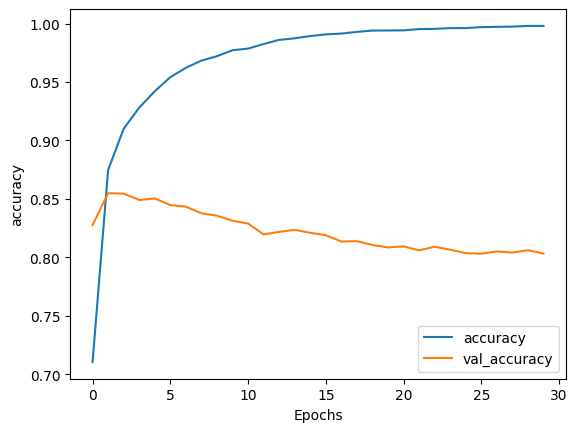

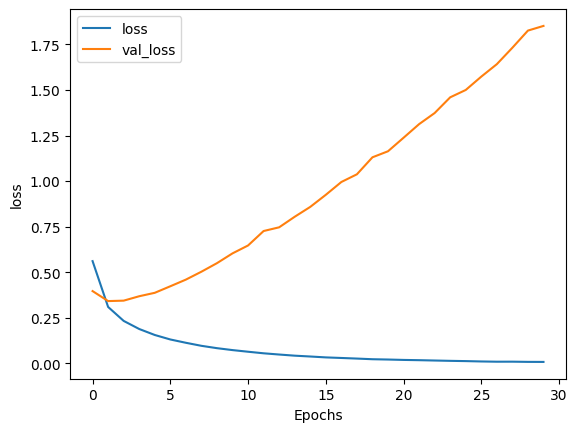

In [92]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [31]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 


(10000, 16)


In [32]:

import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

### 3. Subwords text encoder

Subwords는 문자(Char)와 단어(Wokd)의 중간단위로 Subwords = Sub + wo + rd 로 구분가능. (우리말로 치면 형태소인가)

단어의 세부적인 차이를 표현할 수 있다하고, 자연어 처리에서 언어 모델링이나 번역에서 사용되는데, 

희귀한 단어나 신조어같이 사전에 등록되어 있지 않은 단어를 표현하는데 유용하다고 한다.

In [33]:
import tensorflow_datasets as tfds

# Download the plain text default config
imdb_plaintext, info_plaintext = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

# Download the subword encoded pretokenized dataset
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dl Completed...: 100%|██████████| 1/1 [00:00<00:00, 76.93 url/s] 


Dataset imdb_reviews downloaded and prepared to C:\Users\suhye\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


In [35]:
# Print description of features
info_plaintext.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(), dtype=string),
})

In [36]:
# Take 2 training examples and print the text feature
for example in imdb_plaintext['train'].take(2):
  print(example[0].numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [37]:
# Print description of features
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [38]:
# Take 2 training examples and print its contents
for example in imdb_subwords['train'].take(2):
  print(example)

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [39]:
# Get the encoder
tokenizer_subwords = info_subwords.features['text'].encoder

# Take 2 training examples and decode the text feature
for example in imdb_subwords['train'].take(2):
  print(tokenizer_subwords.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [40]:
# Get the train set
train_data = imdb_plaintext['train']

# Initialize sentences list
training_sentences = []

# Loop over all training examples and save to the list
for s,_ in train_data:
  training_sentences.append(s.numpy().decode('utf8'))

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
oov_tok = '<OOV>'

# Initialize the Tokenizer class
tokenizer_plaintext = Tokenizer(num_words = 10000, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer_plaintext.fit_on_texts(training_sentences)

# Generate the training sequences
sequences = tokenizer_plaintext.texts_to_sequences(training_sentences)

In [42]:
# Decode the first sequence using the Tokenizer class
tokenizer_plaintext.sequences_to_texts(sequences[0:1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

In [43]:
# Total number of words in the word index dictionary
len(tokenizer_plaintext.word_index)

88583

In [44]:
# Print the subwords
print(tokenizer_subwords.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [45]:
# Encode the first plaintext sentence using the subword text encoder
tokenized_string = tokenizer_subwords.encode(training_sentences[0])
print(tokenized_string)

# Decode the sequence
original_string = tokenizer_subwords.decode(tokenized_string)

# Print the result
print (original_string)

[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not re

In [46]:
# Define sample sentence
sample_string = 'TensorFlow, from basics to mastery'

# Encode using the plain text tokenizer
tokenized_string = tokenizer_plaintext.texts_to_sequences([sample_string])
print ('Tokenized string is {}'.format(tokenized_string))

# Decode and print the result
original_string = tokenizer_plaintext.sequences_to_texts(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [[1, 37, 1, 6, 1]]
The original string: ['<OOV> from <OOV> to <OOV>']


In [47]:
# Encode using the subword text encoder
tokenized_string = tokenizer_subwords.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

# Decode and print the results
original_string = tokenizer_subwords.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [48]:
# Show token to subword mapping:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer_subwords.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [49]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# Get the train and test splits
train_data, test_data = imdb_subwords['train'], imdb_subwords['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [50]:
import tensorflow as tf

# Define dimensionality of the embedding
embedding_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 global_average_pooling1d_3   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [51]:
num_epochs = 10

# Set the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Start training
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 10s 25ms/step - loss: 0.6787 - accuracy: 0.6137 - val_loss: 0.6418 - val_accuracy: 0.6714
Epoch 2/10
391/391 [==============================] - 9s 24ms/step - loss: 0.5295 - accuracy: 0.7939 - val_loss: 0.4483 - val_accuracy: 0.8304
Epoch 3/10
391/391 [==============================] - 10s 24ms/step - loss: 0.3681 - accuracy: 0.8702 - val_loss: 0.3596 - val_accuracy: 0.8634
Epoch 4/10
391/391 [==============================] - 9s 24ms/step - loss: 0.2954 - accuracy: 0.8956 - val_loss: 0.3257 - val_accuracy: 0.8758
Epoch 5/10
391/391 [==============================] - 10s 24ms/step - loss: 0.2579 - accuracy: 0.9083 - val_loss: 0.3114 - val_accuracy: 0.8792
Epoch 6/10
391/391 [==============================] - 9s 24ms/step - loss: 0.2324 - accuracy: 0.9157 - val_loss: 0.3050 - val_accuracy: 0.8814
Epoch 7/10
391/391 [==============================] - 9s 24ms/step - loss: 0.2123 - accuracy: 0.9253 - val_loss: 0.3049 - val_accuracy: 0.8

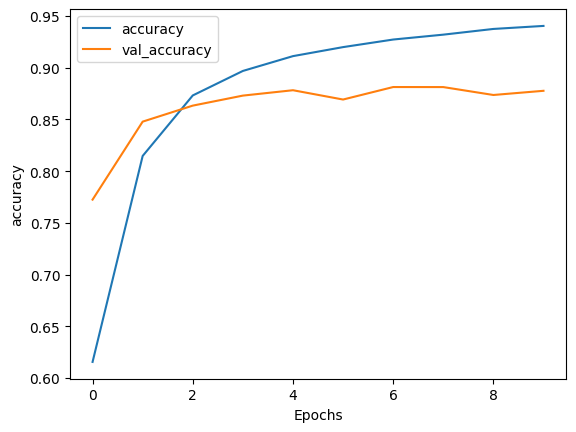

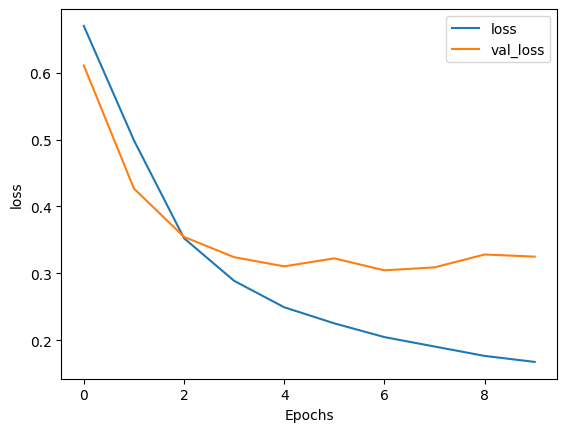

In [50]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

다음과 같이 https://projector.tensorflow.org/ 에서 데이터를 찍어보고 검색도 해보자.

![n](./src/nlpintro1.PNG)